In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib as plt
import seaborn as sns
from tensorflow.keras.models import Sequential 
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split

# Loading the Dataset

In [ ]:
heart_data = pd.read_csv(r"heart.csv")
heart_data.sample(10)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
342,61,M,ASY,110,0,1,Normal,113,N,1.4,Flat,1
191,50,M,ATA,170,209,0,ST,116,N,0.0,Up,0
783,45,F,ASY,138,236,0,LVH,152,Y,0.2,Flat,0
200,47,M,TA,110,249,0,Normal,150,N,0.0,Up,0
623,60,M,ASY,140,293,0,LVH,170,N,1.2,Flat,1
73,44,F,ASY,120,218,0,ST,115,N,0.0,Up,0
247,48,M,ASY,122,275,1,ST,150,Y,2.0,Down,1
235,39,M,ATA,120,200,0,Normal,160,Y,1.0,Flat,0
98,56,M,ASY,120,85,0,Normal,140,N,0.0,Up,0
550,55,M,ASY,172,260,0,Normal,73,N,2.0,Flat,1


In [ ]:
heart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [ ]:
heart_data.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

# Data Preprocessing

In [ ]:
heart_data.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

In [ ]:
heart_data.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [ ]:

heart_data["Sex"] = heart_data["Sex"].replace({"F":0,'M':1})
heart_data["ChestPainType"] = heart_data["ChestPainType"].replace({"ASY":0,"ATA":1,"NAP":2,"TA":3})
heart_data["RestingBP"] = np.where(heart_data["RestingBP"] < 120, 0, 1)
heart_data["ExerciseAngina"] = heart_data["ExerciseAngina"].replace({"N":0,'Y':1})
heart_data["RestingECG"] = heart_data["RestingECG"].replace({'Normal':0,"ST":1,"LVH":2})
heart_data["ST_Slope"] = heart_data["ST_Slope"].replace({"Flat":0,'Up':1})
heart_data.head(10)


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,1,1,289,0,0,172,0,0.0,1,0
1,49,0,2,1,180,0,0,156,0,1.0,0,1
2,37,1,1,1,283,0,1,98,0,0.0,1,0
3,48,0,0,1,214,0,0,108,1,1.5,0,1
4,54,1,2,1,195,0,0,122,0,0.0,1,0
5,39,1,2,1,339,0,0,170,0,0.0,1,0
6,45,0,1,1,237,0,0,170,0,0.0,1,0
7,54,1,1,0,208,0,0,142,0,0.0,1,0
8,37,1,0,1,207,0,0,130,1,1.5,0,1
9,48,0,1,1,284,0,0,120,0,0.0,1,0


In [ ]:
heart_data.sample(10)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
415,66,0,0,1,0,1,0,90,0,0.0,0,1
890,64,1,3,1,227,0,2,155,0,0.6,0,0
341,64,1,0,0,0,1,0,114,1,1.3,Down,1
916,57,0,1,1,236,0,2,174,0,0.0,0,1
573,72,1,0,1,123,1,2,130,0,1.5,0,1
276,51,1,2,1,160,0,0,150,0,2.0,0,1
628,61,1,3,1,234,0,0,145,0,2.6,0,1
153,55,1,0,1,270,0,0,140,0,0.0,1,0
659,59,1,2,1,218,1,0,134,0,2.2,0,1
846,39,1,0,0,219,0,0,140,0,1.2,0,1


# Data Analyzing

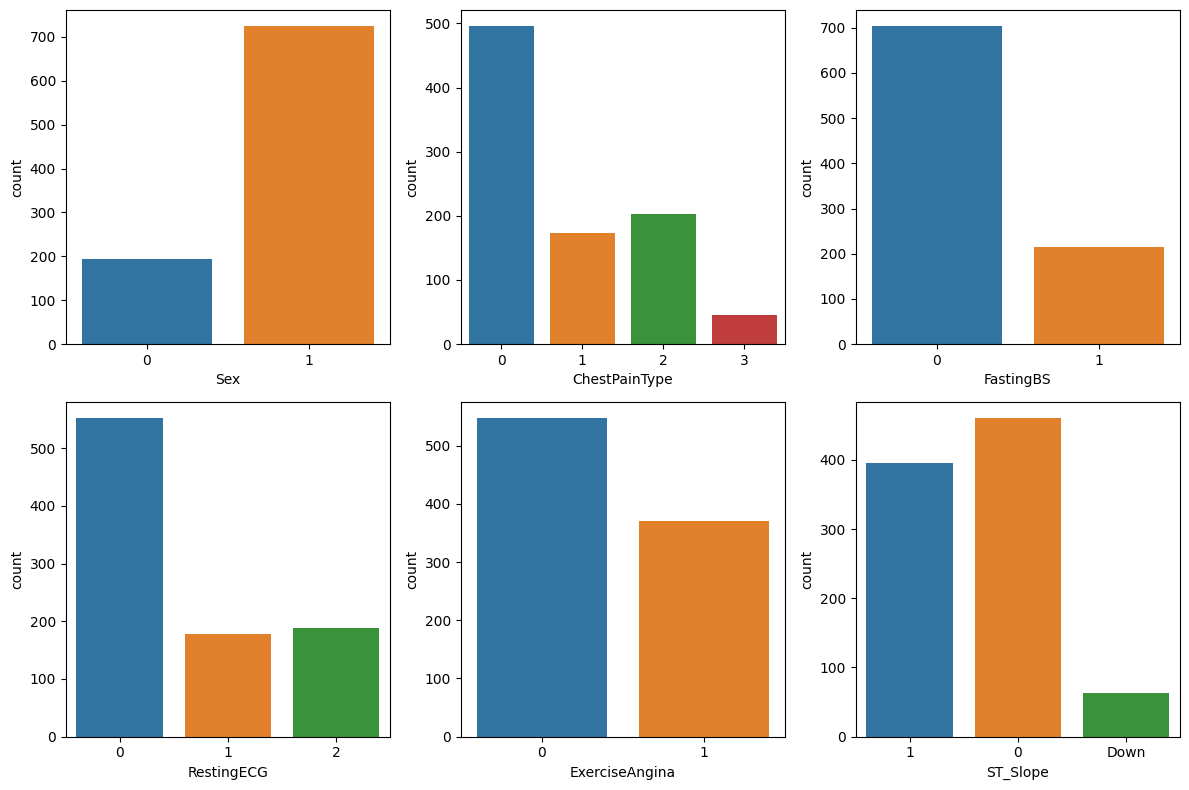

In [ ]:
import matplotlib.pyplot as plt
categorical_vars = ['Sex', 'ChestPainType', 'FastingBS', 'RestingECG', 'ExerciseAngina', 'ST_Slope']

plt.figure(figsize=(12, 8))
for i, var in enumerate(categorical_vars):
    plt.subplot(2, 3, i+1)
    sns.countplot(data=heart_data, x=var)
    plt.xlabel(var)
plt.tight_layout()
plt.show()

<Axes: xlabel='HeartDisease', ylabel='count'>

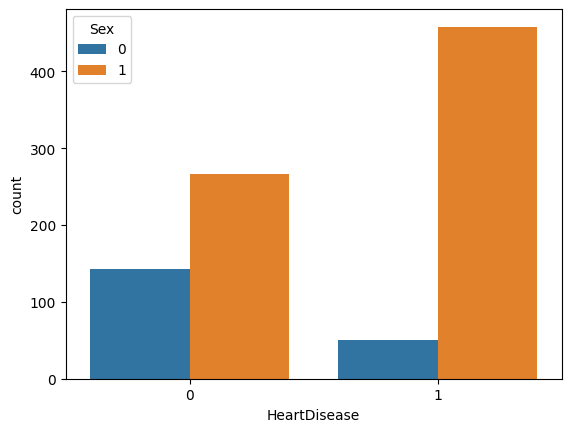

In [ ]:
sns.countplot(data=heart_data, x="HeartDisease",hue="Sex")

<Axes: >

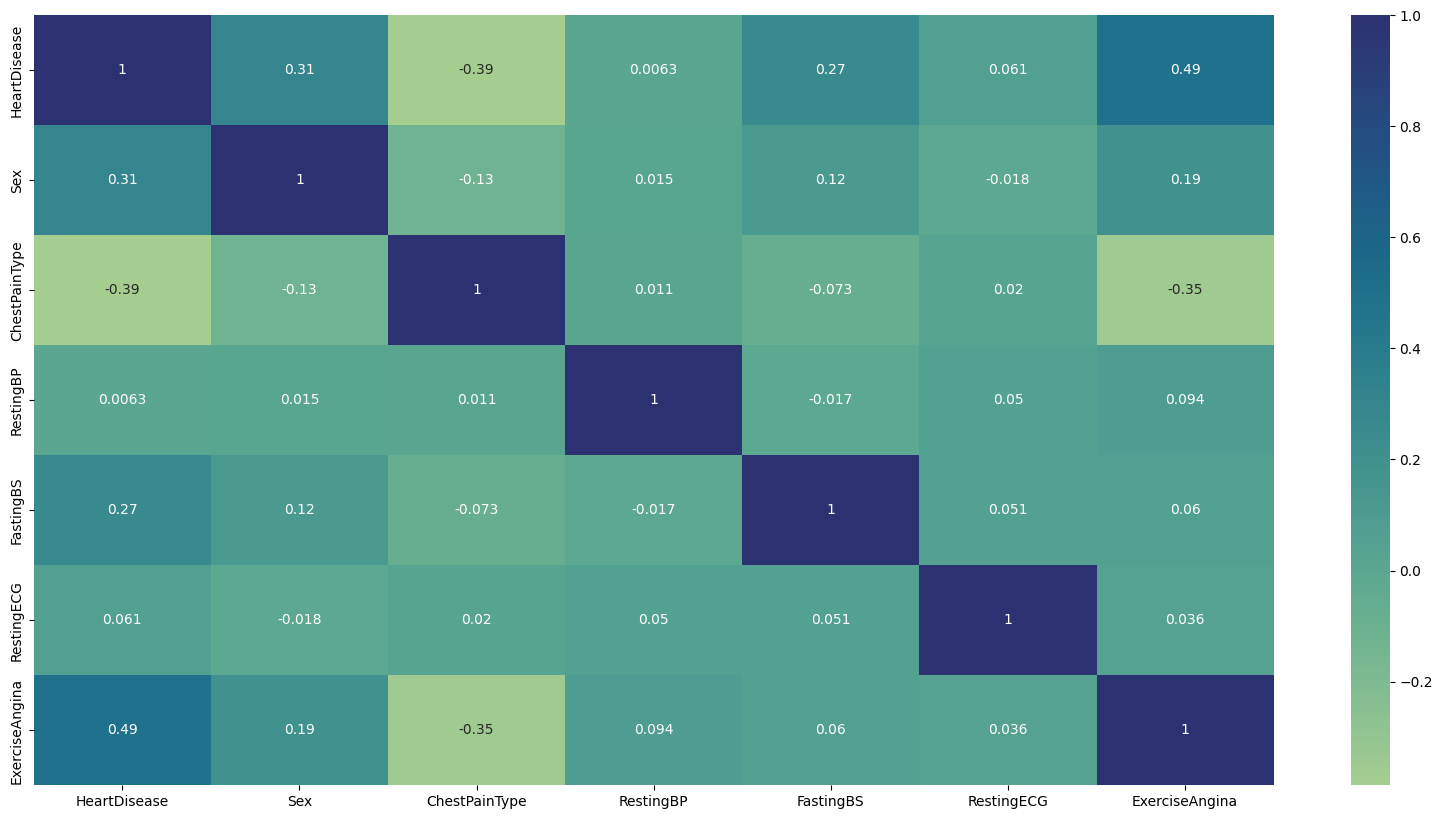

In [ ]:
heart_data_corr = heart_data[["HeartDisease","Sex","ChestPainType","RestingBP", "FastingBS", "RestingECG", "ExerciseAngina"]].corr()
heart_data_corr
plt.figure(figsize = (20,10))
sns.heatmap(heart_data_corr, cmap='crest', annot=True)

<Axes: >

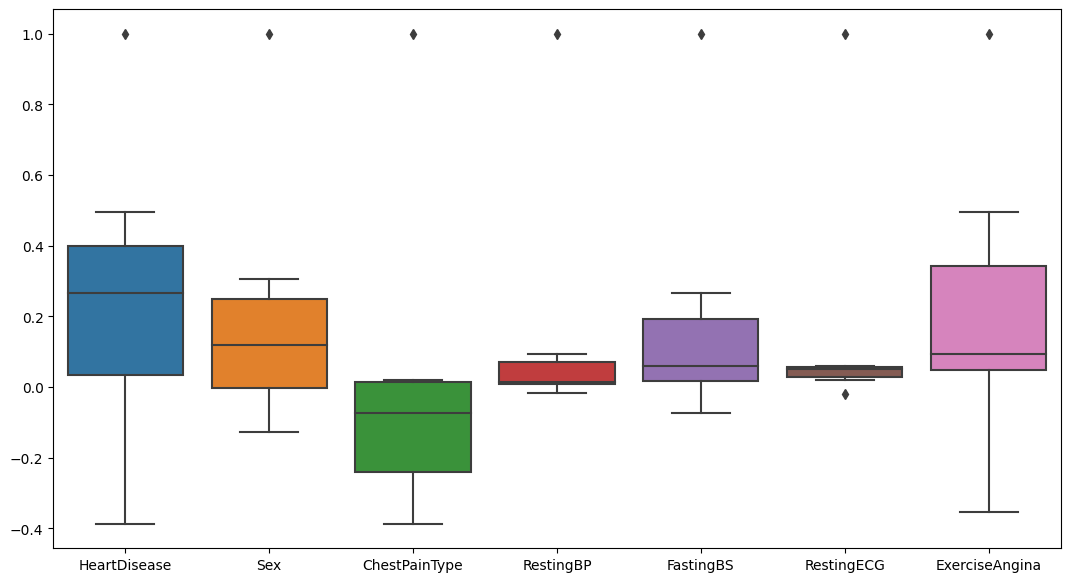

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(13, 7))  
sns.boxplot(data=heart_data_corr)

In [ ]:
heart_data.describe()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,0.789760,0.781046,0.824619,198.799564,0.233115,0.603486,136.809368,0.404139,0.887364,0.553377
std,9.432617,0.407701,0.956519,0.380500,109.384145,0.423046,0.805968,25.460334,0.490992,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,60.000000,0.000000,-2.600000,0.000000
25%,47.000000,1.000000,0.000000,1.000000,173.250000,0.000000,0.000000,120.000000,0.000000,0.000000,0.000000
50%,54.000000,1.000000,0.000000,1.000000,223.000000,0.000000,0.000000,138.000000,0.000000,0.600000,1.000000
75%,60.000000,1.000000,2.000000,1.000000,267.000000,0.000000,1.000000,156.000000,1.000000,1.500000,1.000000
max,77.000000,1.000000,3.000000,1.000000,603.000000,1.000000,2.000000,202.000000,1.000000,6.200000,1.000000


In [ ]:
# from pandas_profiling import ProfileReport
# heart_data = pd.read_csv(r"heart.csv")
# report = ProfileReport(heart_data)
# display(report)

# Featuring and Labeling Data 

In [ ]:
x = heart_data[["Sex","ChestPainType","RestingBP", "FastingBS", "RestingECG", "ExerciseAngina"]]
y = heart_data["HeartDisease"]
x


,Sex,ChestPainType,RestingBP,FastingBS,RestingECG,ExerciseAngina
0,1,1,1,0,0,0
1,0,2,1,0,0,0
2,1,1,1,0,1,0
3,0,0,1,0,0,1
4,1,2,1,0,0,0
...,...,...,...,...,...,...
913,1,3,0,0,0,0
914,1,0,1,1,0,0
915,1,0,1,0,0,1
916,0,1,1,0,2,0


# Spliting the Data

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(x,y, test_size = 0.9, random_state = 42)
X_train_tensors = tf.convert_to_tensor(X_train, dtype=tf.float32)
Y_train_tensors = tf.convert_to_tensor(Y_train, dtype=tf.float32)
X_test_tensors = tf.convert_to_tensor(X_test, dtype=tf.float32)
Y_test_tensors = tf.convert_to_tensor(Y_test, dtype=tf.float32)

# Modeling the Data 

In [ ]:
model = Sequential([Dense(64, activation = "relu"),
                   Dense(32, activation = "relu"),
                   Dense(1, activation = "sigmoid")
                   ])

# Choosing the Optimizer, Loss Function and Fitting the Model

In [ ]:
optimizer = Adam(learning_rate=0.01)
model.compile(loss = "binary_crossentropy", optimizer = optimizer, metrics = ["accuracy"])
history = model.fit(X_train_tensors, Y_train_tensors, validation_data=(X_test_tensors, Y_test_tensors), epochs=100)


Epoch 1/100
3/3 [==============================] - 3s 277ms/step - loss: 0.6780 - accuracy: 0.5934 - val_loss: 0.5821 - val_accuracy: 0.7884
Epoch 2/100
3/3 [==============================] - 0s 60ms/step - loss: 0.6074 - accuracy: 0.7253 - val_loss: 0.5528 - val_accuracy: 0.7836
Epoch 3/100
3/3 [==============================] - 0s 66ms/step - loss: 0.5665 - accuracy: 0.6923 - val_loss: 0.5222 - val_accuracy: 0.7908
Epoch 4/100
3/3 [==============================] - 0s 88ms/step - loss: 0.5325 - accuracy: 0.7582 - val_loss: 0.5235 - val_accuracy: 0.7956
Epoch 5/100
3/3 [==============================] - 0s 68ms/step - loss: 0.5056 - accuracy: 0.7802 - val_loss: 0.5162 - val_accuracy: 0.7920
Epoch 6/100
3/3 [==============================] - 0s 61ms/step - loss: 0.4932 - accuracy: 0.7802 - val_loss: 0.5465 - val_accuracy: 0.7884
Epoch 7/100
3/3 [==============================] - 0s 68ms/step - loss: 0.4697 - accuracy: 0.8022 - val_loss: 0.5461 - val_accuracy: 0.7872
Epoch 8/100
3/3 [==

3/3 [==============================] - 0s 68ms/step - loss: 0.2489 - accuracy: 0.8681 - val_loss: 1.2007 - val_accuracy: 0.7183
Epoch 60/100
3/3 [==============================] - 0s 64ms/step - loss: 0.2442 - accuracy: 0.8681 - val_loss: 1.2203 - val_accuracy: 0.6675
Epoch 61/100
3/3 [==============================] - 0s 69ms/step - loss: 0.2460 - accuracy: 0.8791 - val_loss: 1.1924 - val_accuracy: 0.7013
Epoch 62/100
3/3 [==============================] - 0s 64ms/step - loss: 0.2434 - accuracy: 0.8571 - val_loss: 1.2650 - val_accuracy: 0.6820
Epoch 63/100
3/3 [==============================] - 0s 77ms/step - loss: 0.2420 - accuracy: 0.8791 - val_loss: 1.2019 - val_accuracy: 0.7170
Epoch 64/100
3/3 [==============================] - 0s 87ms/step - loss: 0.2433 - accuracy: 0.8681 - val_loss: 1.1615 - val_accuracy: 0.7062
Epoch 65/100
3/3 [==============================] - 0s 79ms/step - loss: 0.2525 - accuracy: 0.8681 - val_loss: 1.2528 - val_accuracy: 0.6300
Epoch 66/100
3/3 [========

# Evaluating the Performance of Model

In [ ]:
loss, accuracy = model.evaluate(X_test, Y_test)
print("Test Loss: ",loss)
print("Test Accuracy: ",accuracy)

26/26 [==============================] - 0s 3ms/step - loss: 1.3709 - accuracy: 0.7207
Test Loss:  1.3709216117858887
Test Accuracy:  0.7206771373748779


# Prediction of Test Dataset

In [ ]:
predictions = model.predict(X_test)

26/26 [==============================] - 0s 2ms/step


In [ ]:
loss, accuracy = model.evaluate(X_train, Y_train)
print("Test Loss: ",loss)
print("Test Accuracy: ",accuracy)

3/3 [==============================] - 0s 4ms/step - loss: 0.2315 - accuracy: 0.8791
Test Loss:  0.23152904212474823
Test Accuracy:  0.8791208863258362


# Machine Learning

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size = 0.9 , random_state = 42)

In [ ]:
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()
scalar.fit(X_train)

StandardScaler()

In [ ]:
heart_data.describe()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,0.789760,0.781046,0.824619,198.799564,0.233115,0.603486,136.809368,0.404139,0.887364,0.553377
std,9.432617,0.407701,0.956519,0.380500,109.384145,0.423046,0.805968,25.460334,0.490992,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,60.000000,0.000000,-2.600000,0.000000
25%,47.000000,1.000000,0.000000,1.000000,173.250000,0.000000,0.000000,120.000000,0.000000,0.000000,0.000000
50%,54.000000,1.000000,0.000000,1.000000,223.000000,0.000000,0.000000,138.000000,0.000000,0.600000,1.000000
75%,60.000000,1.000000,2.000000,1.000000,267.000000,0.000000,1.000000,156.000000,1.000000,1.500000,1.000000
max,77.000000,1.000000,3.000000,1.000000,603.000000,1.000000,2.000000,202.000000,1.000000,6.200000,1.000000


In [ ]:
X_train_scaled =scalar.transform(X_train)
X_test_scaled = scalar.transform(X_test)



# Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(X_train_scaled, Y_train)

LogisticRegression()

In [ ]:
log_reg_pred=log_reg.predict(X_test)
from sklearn.metrics import accuracy_score
log_reg_acc = accuracy_score(Y_test, log_reg_pred)
log_reg_acc

C:\Users\AFC\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


0.7762998790810157

# Decision Tree Classifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dec_tree = DecisionTreeClassifier()
dec_tree.fit(X_train,Y_train)

DecisionTreeClassifier()

In [ ]:
dec_tree_pre = dec_tree.predict(X_test)
dec_tree_acc= accuracy_score(Y_test, dec_tree_pre)
dec_tree_acc

0.6807738814993954

# Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
ran_cla = RandomForestClassifier()
ran_cla.fit(X_train,Y_train)

RandomForestClassifier()

In [ ]:
ran_cla_pre = ran_cla.predict(X_test)
ran_cla_acc = accuracy_score(Y_test, ran_cla_pre)
ran_cla_acc

0.7110036275695284

# XGBoost

In [ ]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(X_train,Y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [ ]:
xgb_pre = xgb.predict(X_test)
xgb_acc = accuracy_score(Y_test, xgb_pre)
xgb_acc

0.7230955259975816

In [ ]:
def print_accuracy_scores(accuracy, log_reg_acc, dec_tree_acc, ran_cla_acc, xgb_acc):
    print("Neural Network Accuracy: {:.2f}%".format(accuracy * 100))
    print("Logistic Regression Accuracy: {:.2f}%".format(log_reg_acc * 100))
    print("Decision Tree Classifier Accuracy: {:.2f}%".format(dec_tree_acc * 100))
    print("Random Forest Accuracy: {:.2f}%".format(ran_cla_acc * 100))
    print("XGBoost Accuracy: {:.2f}%".format(xgb_acc * 100))

print_accuracy_scores(accuracy, log_reg_acc, dec_tree_acc, ran_cla_acc, xgb_acc)

Neural Network Accuracy: 87.91%
Logistic Regression Accuracy: 77.63%
Decision Tree Classifier Accuracy: 68.08%
Random Forest Accuracy: 71.10%
XGBoost Accuracy: 72.31%


Neural Networks Provided the Best Accuracy Score 